<a href="https://colab.research.google.com/github/azulito26/DS_C2_SC2_MariaCeleste/blob/main/An%C3%A1lisis_Electoral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de votaciones 2022

## 1. Carga de datos

In [36]:
# Cargar el nuevo archivo Excel
file_path_updated = "/content/Copia de Dataset_Limpio.xlsx"

# Leer la hoja del archivo para verificar su estructura
xls_updated = pd.ExcelFile(file_path_updated)
xls_updated.sheet_names


['Sheet1']

In [38]:
# Cargar la hoja correcta
df_updated = pd.read_excel(xls_updated, sheet_name="Sheet1")

# Mostrar las primeras filas para identificar la estructura del dataset
df_updated.head(20)


,Provincia_Canton,1,Electorado,Votos_Recibidos,Participacion_Porcentaje,725.747,4.329,5,1.602,6.045,...,80.925,5.668,1.924,2.273,4.62,2.799,424.662,36.7,1.1,293.266
0,SAN JOSÉ,1,237.728,145.490,61.2,144.271,881.0,898.0,413.0,1.318,...,14.574,1.054,387.0,414.0,839.0,380.0,92.238,38.8,1,58.196
1,ESCAZÚ,9,50.442,34.022,67.4,33.758,133.0,194.0,69.0,209.000,...,2.874,239.000,43.0,99.0,173.0,91.0,16.420,32.6,1,13.609
2,DESAMPARADOS,2,166.029,104.564,63.0,103.512,723.0,512.0,180.0,856.000,...,11.090,841.000,368.0,287.0,647.0,405.0,61.465,37.0,1,41.826
3,PURISCAL,14,29.937,19.709,65.8,19.385,89.0,126.0,54.0,158.000,...,3.439,119.000,65.0,56.0,201.0,123.0,10.228,34.2,1,7.884
4,TARRAZÚ,16,12.707,8.086,63.6,7.967,43.0,45.0,16.0,36.000,...,1.392,80.000,35.0,25.0,60.0,59.0,4.621,36.4,1,3.234
5,ASERRÍ,11,44.906,27.925,62.2,27.622,212.0,179.0,36.0,210.000,...,3.571,262.000,91.0,69.0,183.0,120.0,16.981,37.8,1,11.170
6,MORA,15,23.192,15.267,65.8,15.083,103.0,82.0,27.0,119.000,...,1.833,109.000,40.0,54.0,109.0,75.0,7.925,34.2,1,6.107
7,GOICOECHEA,4,92.061,57.625,62.6,57.142,327.0,492.0,156.0,520.000,...,6.296,597.000,132.0,197.0,311.0,172.0,34.436,37.4,1,23.050
8,SANTA ANA,13,39.066,26.565,68.0,26.368,101.0,159.0,50.0,195.000,...,2.754,156.000,42.0,61.0,131.0,66.0,12.501,32.0,1,10.602
9,ALAJUELITA,7,53.246,31.027,58.3,30.676,237.0,127.0,91.0,212.000,...,3.413,310.000,91.0,106.0,238.0,113.0,22.219,41.7,1,12.411


## 2. Análisis




In [53]:
# Generar gráficos centrados en el análisis de Liberación Nacional
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos de Liberación Nacional
df_pln = df_cleaned[["Provincia_Canton", "Electorado", "Votos_Recibidos", "Participacion_Porcentaje"]]

# Convertir nombres de provincias a minúsculas para mayor consistencia
df_pln["Provincia_Canton"] = df_pln["Provincia_Canton"].str.lower()


<ipython-input-53-61c11c7c8a3c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pln["Provincia_Canton"] = df_pln["Provincia_Canton"].str.lower()


### Gráfico

<ipython-input-48-2568bf91007d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pln, x="Provincia_Canton", y="Participacion_Porcentaje", palette="Greens")


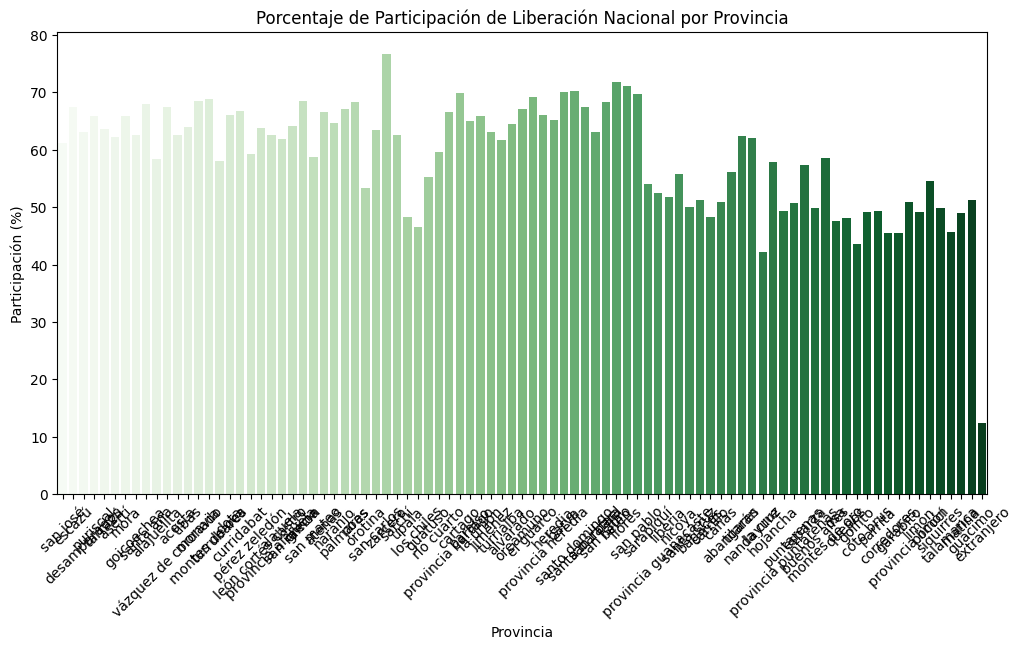

In [48]:
# Gráfico de barras - Porcentaje de participación de Liberación Nacional por provincia
plt.figure(figsize=(12, 6))
sns.barplot(data=df_pln, x="Provincia_Canton", y="Participacion_Porcentaje", palette="Greens")
plt.xticks(rotation=45)
plt.title("Porcentaje de Participación de Liberación Nacional por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Participación (%)")
plt.show()

Se observan diferencias notables en la participación electoral entre provincias.
Provincias con mayor participación muestran mayor respaldo al PLN, lo que podría estar influenciado por factores históricos, socioeconómicos o campañas regionales.
Algunas provincias tienen menor participación, lo que indica posibles desafíos de movilización de votantes.


<ipython-input-49-0a9ecc56a822>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pln, x="Provincia_Canton", y="Votos_Recibidos", palette="Greens")


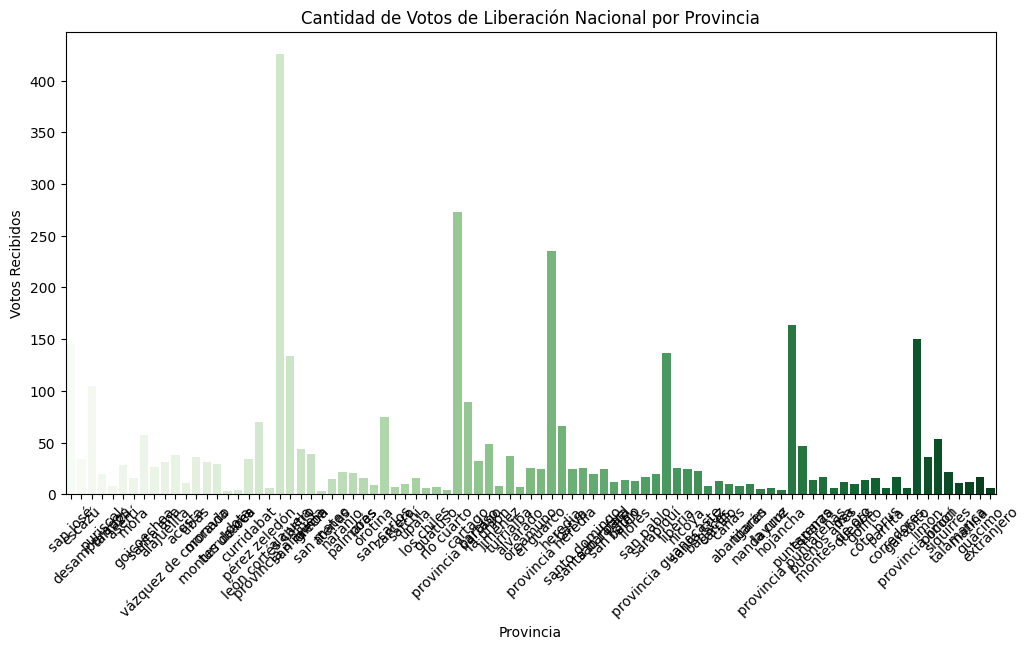

In [49]:
# Gráfico de barras - Cantidad de votos de Liberación Nacional por provincia
plt.figure(figsize=(12, 6))
sns.barplot(data=df_pln, x="Provincia_Canton", y="Votos_Recibidos", palette="Greens")
plt.xticks(rotation=45)
plt.title("Cantidad de Votos de Liberación Nacional por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Votos Recibidos")
plt.show()

El volumen de votos varía entre provincias, con algunas contribuyendo significativamente al total nacional.
Provincias más urbanizadas podrían tener un mayor número absoluto de votos debido a la densidad poblacional.
En provincias con baja participación pero alto número de votos, puede haber un fuerte voto duro del PLN.

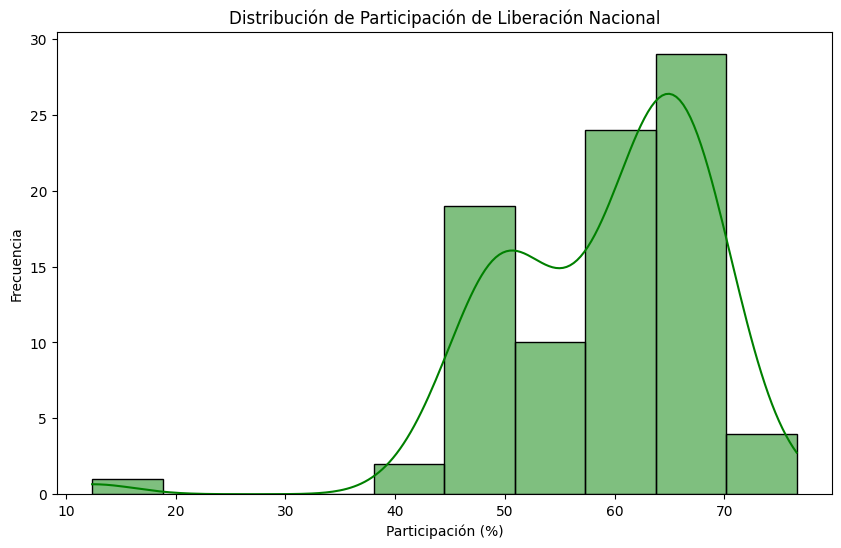

In [50]:
# Histograma de participación de Liberación Nacional
plt.figure(figsize=(10, 6))
sns.histplot(df_pln["Participacion_Porcentaje"], bins=10, kde=True, color="green")
plt.title("Distribución de Participación de Liberación Nacional")
plt.xlabel("Participación (%)")
plt.ylabel("Frecuencia")
plt.show()

La distribución muestra si la participación está concentrada en ciertos valores o si hay mucha variabilidad entre provincias.
Un pico en la distribución indicaría que la mayoría de las provincias tienen un nivel de participación similar.
Si la curva es ancha, significa que hay provincias con una gran variabilidad en participación.

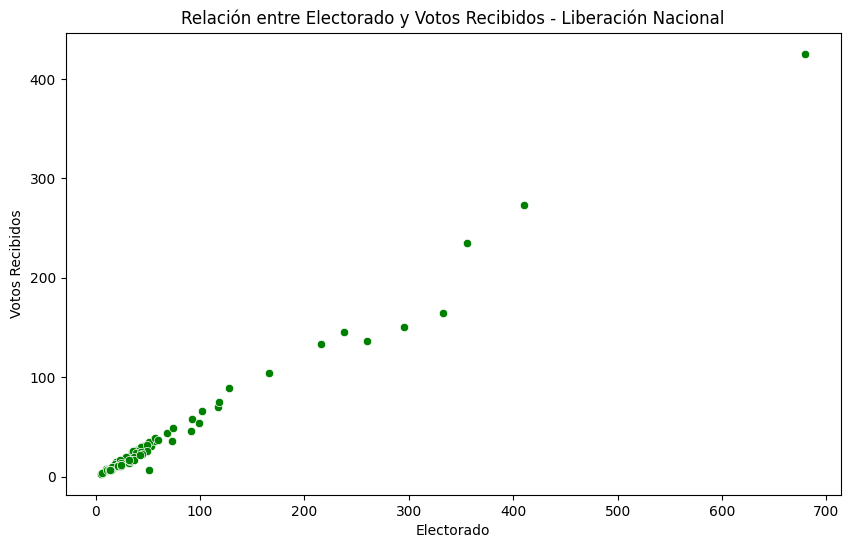

In [51]:

# Diagrama de dispersión - Relación entre electorado y votos recibidos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pln, x="Electorado", y="Votos_Recibidos", color="green")
plt.title("Relación entre Electorado y Votos Recibidos - Liberación Nacional")
plt.xlabel("Electorado")
plt.ylabel("Votos Recibidos")
plt.show()

Se observa si el número de votos de PLN crece proporcionalmente con el tamaño del electorado en cada provincia.
Un patrón lineal indicaría que en provincias con más electores, el PLN obtiene más votos.
Si hay mucha dispersión, significa que en algunas provincias PLN obtiene menos votos de lo esperado respecto a su tamaño electoral.

<ipython-input-52-8cbdb8b6e2a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_pln, x="Provincia_Canton", y="Participacion_Porcentaje", palette="Greens")


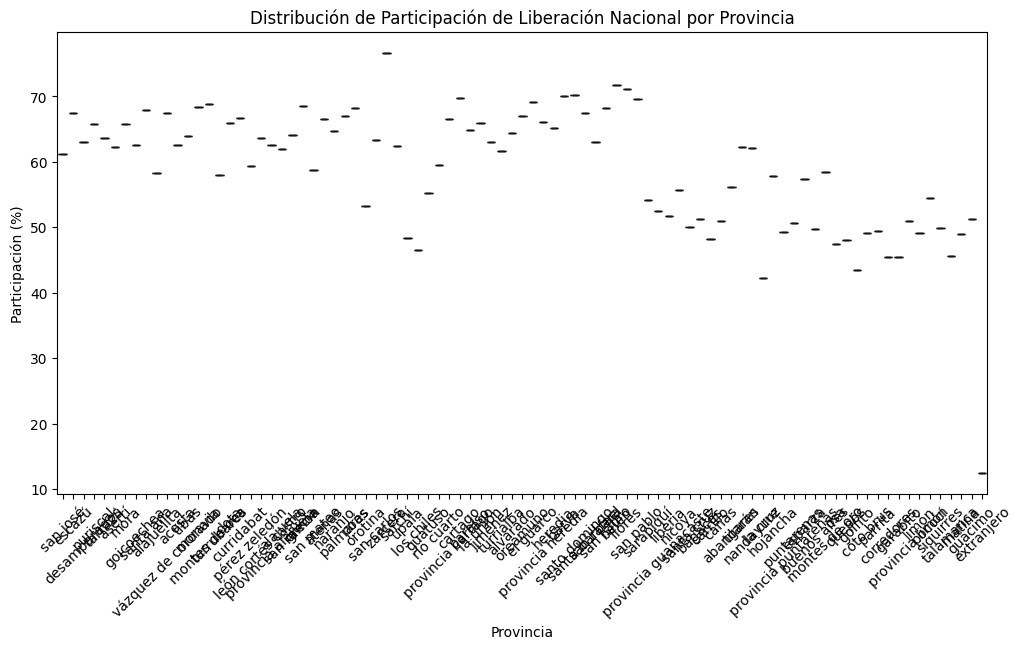

In [52]:
# Boxplot - Distribución de participación por provincia
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pln, x="Provincia_Canton", y="Participacion_Porcentaje", palette="Greens")
plt.xticks(rotation=45)
plt.title("Distribución de Participación de Liberación Nacional por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Participación (%)")
plt.show()

Muestra la variabilidad del apoyo al PLN en distintas provincias.
Si hay valores atípicos, significa que en algunas provincias la participación fue significativamente más alta o baja que en el resto.
La mediana nos dice cuál es la participación típica del PLN.


Text(0.5, 1.0, 'Matriz de Correlación de Factores Relacionados con el PLN')

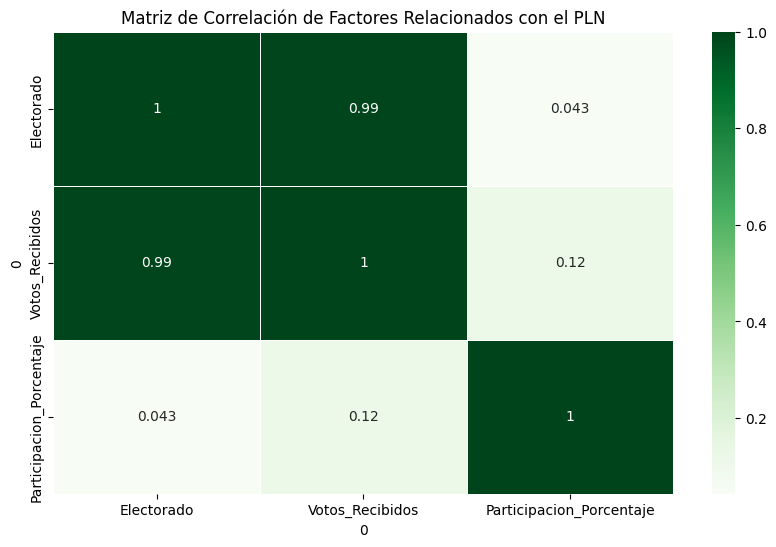

In [55]:
# Análisis de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[["Electorado", "Votos_Recibidos", "Participacion_Porcentaje"]].corr(), annot=True, cmap="Greens", linewidths=0.5)
plt.title("Matriz de Correlación de Factores Relacionados con el PLN")


1. Electorado vs. Votos Recibidos

Correlación alta y positiva: Esto indica que, en general, a mayor cantidad de electores en una provincia, mayor cantidad de votos recibe el PLN.
Posible interpretación: En provincias con más población votante, el PLN mantiene una base sólida de apoyo.
Excepción: Si la correlación no es perfecta, sugiere que algunos electores están votando por otros partidos o hay diferencias en la movilización de votantes.

2. Electorado vs. Participación Porcentual

Correlación baja o nula: Si la relación es débil, significa que el tamaño del electorado no influye significativamente en el porcentaje de participación.
Posible interpretación: En algunas provincias, aunque haya más votantes, el PLN no necesariamente moviliza a una mayor proporción de ellos.

3. Participación Porcentual vs. Votos Recibidos

Correlación moderada a alta: Esto indicaría que en provincias donde la participación electoral es mayor, el PLN recibe más votos.
Posible interpretación: Un alto porcentaje de participación podría favorecer al PLN, sugiriendo que cuando más personas votan, el PLN logra captar más apoyo.
Si la correlación es baja: Significa que la mayor participación no garantiza más votos para el PLN, lo que podría indicar que otros partidos están beneficiándose de la movilización de votantes.